Importing the dataset

In [ ]:
from google.colab import files

files.upload()

Saving creditcardfraud.zip to creditcardfraud.zip


In [ ]:
# Need to only execute this cell if you are directly importing the dataset from kaggle
# Importing the dataset from kaggle please go through https://www.kaggle.com/discussions/general/74235 to view the steps in detail


# from google.colab import files

# upload the .kaggle.json after creating a /kaggle folder
# files.upload()
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
#  ! kaggle datasets list
#  !kaggle datasets download -d mlg-ulb/creditcardfraud

In [ ]:
import pandas as pd
import numpy as np
! unzip creditcardfraud.zip
data = pd.read_csv('/content/creditcard.csv')
np.random.seed(239545)  # This is done to ensure reproducability of results

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: creditcard.csv          


**We have succesfully downloaded, extracted and loaded the data required. Now we can explore the structure of the dataset and take decisive actions to prepare the data and to make decisions on feature selection**

## **1.Pre-processing and Feature Selection**

In [ ]:
data['Class'].value_counts() # The result shows that this is a highly imbalanced dataset

0    284315
1       492
Name: Class, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

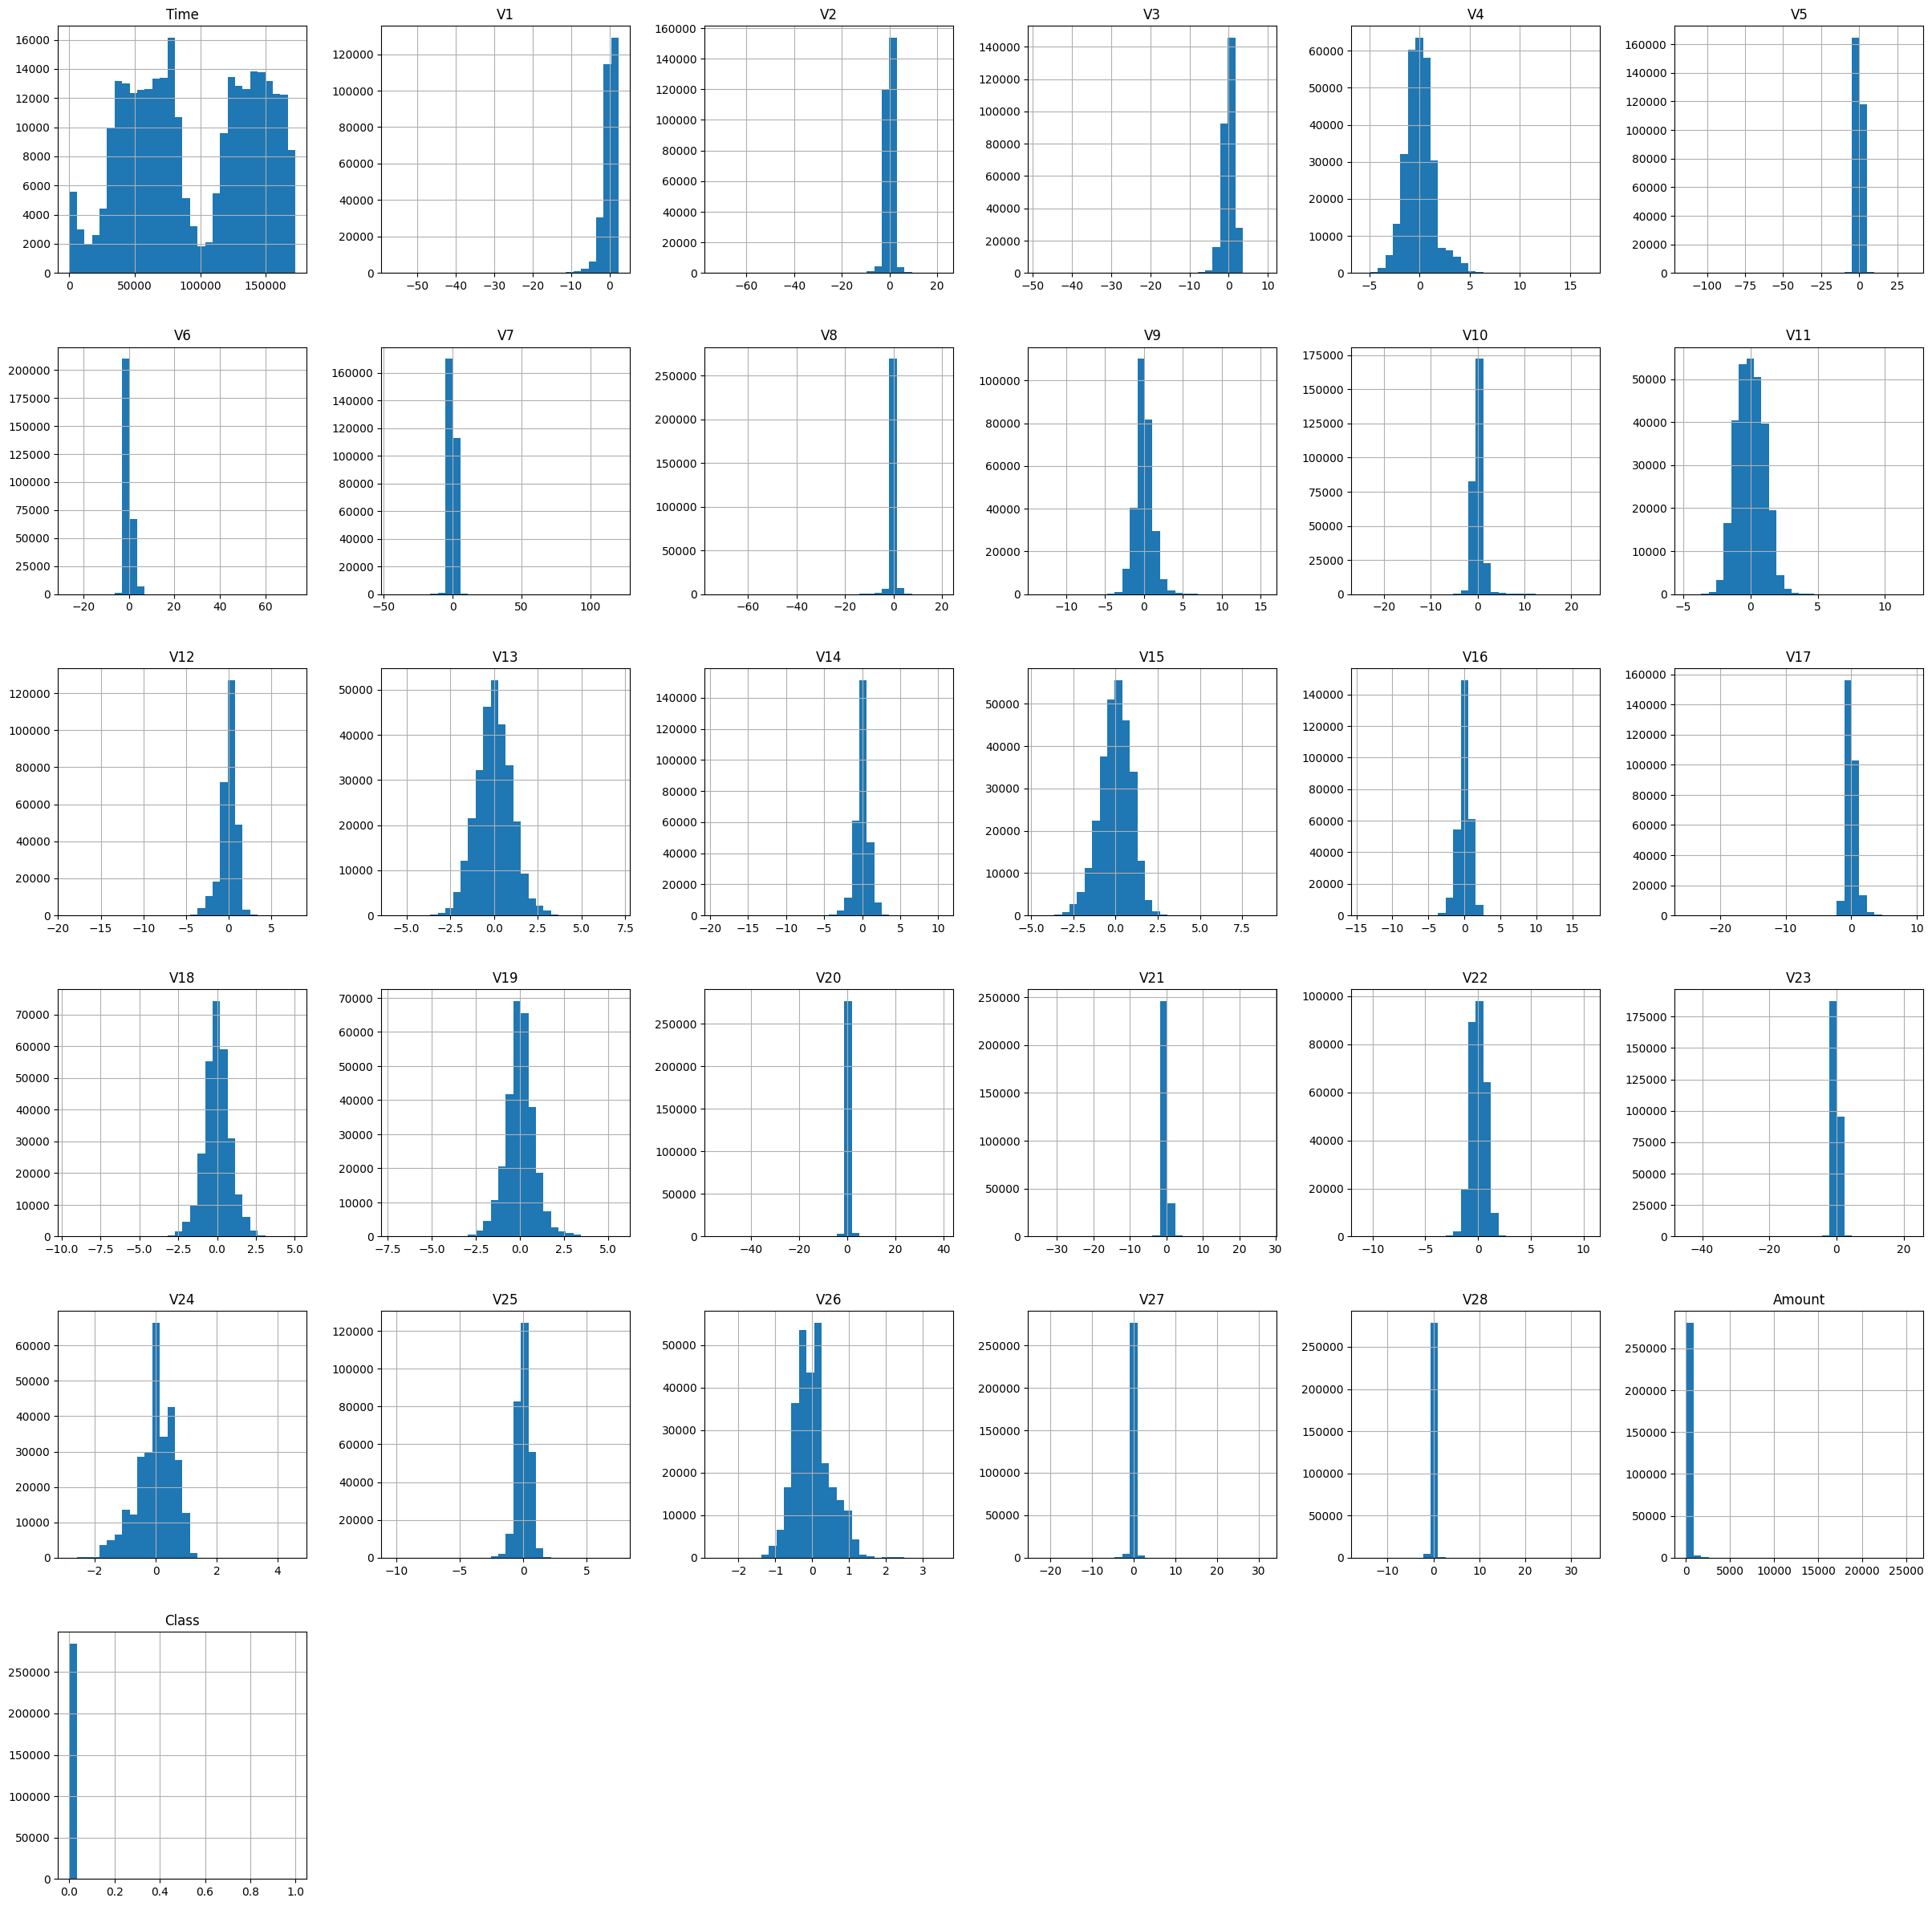

In [ ]:
data.hist(bins=30, figsize=(30,30))

In [ ]:
data.describe()

In [ ]:
from sklearn.preprocessing import RobustScaler
new_df = data.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
# new_df['Amount'].hist()
new_df = new_df.drop(columns=['Time'])
new_df = new_df.sample(frac=1,random_state=239545) #random state specified to ensure reproducability
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77576,-0.965792,0.717385,2.761009,2.413245,-0.029394,0.751082,-0.250734,0.409865,-0.915392,0.580539,...,0.197255,0.580512,-0.191938,0.014703,0.204736,0.285554,-0.028483,0.085778,-0.293440,0
81531,-1.168690,-1.001091,2.894999,-2.533764,-2.207204,0.310899,-1.114249,-0.414566,-0.495962,0.083799,...,0.539825,-0.299515,-0.173835,0.312929,0.464281,-0.268159,0.184364,0.032405,1.075945,0
17768,1.208528,-0.915669,0.982033,-0.714593,-1.143495,0.531814,-1.190648,0.230241,-0.537416,0.574384,...,0.407279,1.211350,-0.181590,-0.205796,0.424887,-0.023308,0.062049,0.019346,0.461119,0
13744,1.278303,-0.787643,-1.466128,-1.561126,1.725751,3.040497,-0.670727,0.557801,0.060464,0.271611,...,-0.341555,-1.272446,0.009119,0.917566,0.444838,-0.564783,-0.060986,0.020117,1.383358,0
226622,2.219749,-0.761727,-1.268440,-0.866305,-0.722257,-1.347358,-0.437915,-0.337707,-0.351059,0.897790,...,0.439942,1.266351,0.008211,0.023314,0.144086,0.082069,-0.037838,-0.067691,-0.167680,0


### **1.1.Divide the dataset into training and testing sets**
**With the pre-processings completed lets move on to the process of splitting the dataset into test and train**

In [ ]:
train, test = new_df[:240000], new_df[240000:]
train['Class'].value_counts(),test['Class'].value_counts()

(0    239584
 1       416
 Name: Class, dtype: int64,
 0    44731
 1       76
 Name: Class, dtype: int64)

In [ ]:
# convert test, train and val to numpy arrays
train_np, test_np = train.to_numpy(),test.to_numpy(),
train_np.shape,test_np.shape

((240000, 30), (44807, 30))

In [ ]:
x_train, y_train = train_np[:, :-1] , train_np[:, -1] # for x_train we take all rows and 30 cols excluding the class, for y train we take all rows but only the 31st col which is the class
x_test, y_test   = test_np[:, :-1] , test_np[:, -1] # for x_test we take all rows and 30 cols excluding the class, for y test we take all rows but only the 31st col which is the class

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((240000, 29), (240000,), (44807, 29), (44807,))

## **2.Artifically create a balanced dataset**
We will create a balanced dataset combining undersampling and oversampling techniques

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd



# Apply oversampling to minority class
oversampler = RandomOverSampler(sampling_strategy=.3, random_state=239545)
x_train_oversampled, y_train_oversampled = oversampler.fit_resample(x_train, y_train)


#  apply undersampling to majority class
undersampler = RandomUnderSampler(sampling_strategy=.4, random_state=239545)
x_train_balanced, y_train_balanced  = undersampler.fit_resample(x_train_oversampled, y_train_oversampled)


# Print the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after resampling:
0.0    179687
1.0     71875
dtype: int64


## **3.Supervised method**

### **3.1.Support Vector Machine (SVM) on Imbalanced Dataset**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
svc = LinearSVC(class_weight='balanced',random_state=239545) # random state added for reproducability
svc.fit(x_train,y_train)
print(classification_report(y_test, svc.predict(x_test),target_names=['Not Fraud','Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     44731
       Fraud       0.70      0.75      0.73        76

    accuracy                           1.00     44807
   macro avg       0.85      0.87      0.86     44807
weighted avg       1.00      1.00      1.00     44807



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


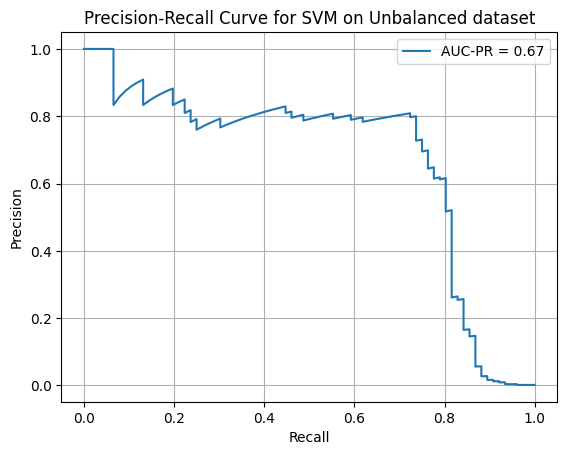

Average Precision : 0.6766981994391814
Area Under the Precision-Recall Curve (AUPRC) : 0.6742613630662013


In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve,auc
import matplotlib.pyplot as plt
# Get the predicited probability of testing data
y_score_svm = svc.decision_function(x_test)

# Average precision score
average_precision_svm = average_precision_score(y_test, y_score_svm)

# Data to plot precision - recall curve
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_score_svm)

# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_svm = auc(recall_svm, precision_svm)

plt.plot(recall_svm, precision_svm,label=f'AUC-PR = {auc_precision_recall_svm:.2f}')
plt.title("Precision-Recall Curve for SVM on Unbalanced dataset")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='best')
plt.grid()
plt.show()

print('Average Precision : {}'.format(average_precision_svm))
print('Area Under the Precision-Recall Curve (AUPRC) : {}'.format(auc_precision_recall_svm))

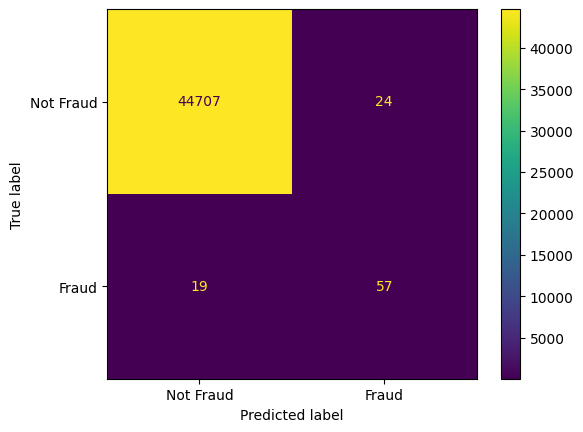

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_score_svm = svc.decision_function(x_test)
threshold = 0.0
y_pred = np.where(y_score_svm > threshold, 1, 0)
cm = confusion_matrix(y_test,y_pred , labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Not Fraud','Fraud'])
disp.plot()
plt.show()



### **3.2.SVM on Balanced Dataset**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
svc_balanced = LinearSVC(random_state=239545) # random state added for reproducability
svc_balanced.fit(x_train_balanced,y_train_balanced)
print(classification_report(y_test, svc_balanced.predict(x_test),target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00     44731
       Fraud       0.15      0.89      0.25        76

    accuracy                           0.99     44807
   macro avg       0.57      0.94      0.62     44807
weighted avg       1.00      0.99      0.99     44807



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


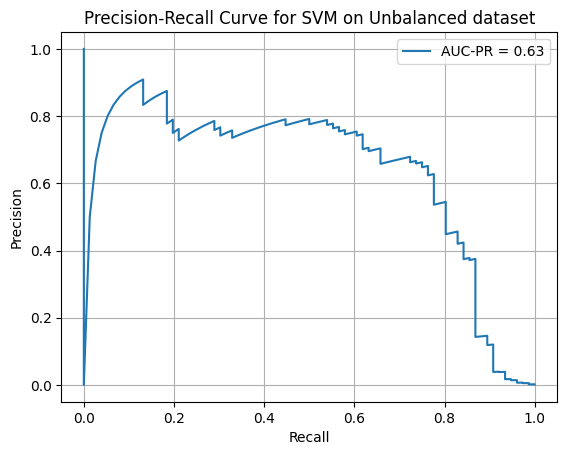

Average Precision : 0.6390975858055421
Area Under the Precision-Recall Curve (AUPRC) : 0.6308534164967172


In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve,auc
import matplotlib.pyplot as plt
# Get the predicited probability of testing data
y_score_svm_balanced = svc_balanced.decision_function(x_test)

# Average precision score
average_precision_svm_balanced = average_precision_score(y_test, y_score_svm_balanced)

# Data to plot precision - recall curve
precision_svm_balanced, recall_svm_balanced, thresholds_svm_balanced = precision_recall_curve(y_test, y_score_svm_balanced)

# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_svm_balanced = auc(recall_svm_balanced, precision_svm_balanced)

plt.plot(recall_svm_balanced, precision_svm_balanced,label=f'AUC-PR = {auc_precision_recall_svm_balanced:.2f}')
plt.title("Precision-Recall Curve for SVM on Unbalanced dataset")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='best')
plt.grid()
plt.show()

print('Average Precision : {}'.format(average_precision_svm_balanced))
print('Area Under the Precision-Recall Curve (AUPRC) : {}'.format(auc_precision_recall_svm_balanced))

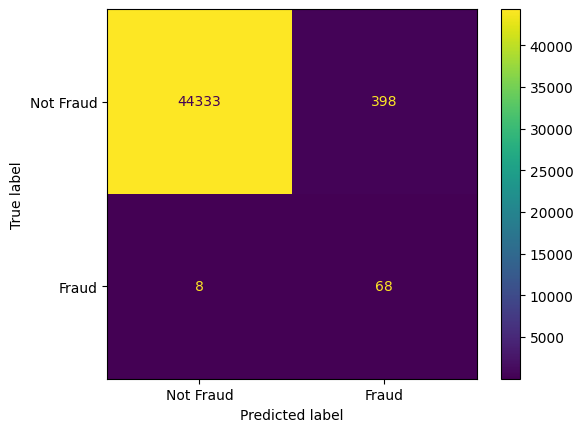

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_score_svm_b = svc_balanced.decision_function(x_test)
threshold = 0.0
y_pred_b = np.where(y_score_svm_b > threshold, 1, 0)
cm = confusion_matrix(y_test,y_pred_b , labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Not Fraud','Fraud'])
disp.plot()
plt.show()


## **4.Unsupervised method**

### **4.1.Isolation Forest on Imbalanced dataset**

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score

#  non balanced
fraud = data[data['Class'] == 1] # Number of fraudulent transactions
valid = data[data['Class'] == 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))


isolationForest = IsolationForest(max_samples = len(x_train),contamination = outlier_fraction,random_state=239545).fit(x_train) # random state added for reproducability # Fitting the model.
y_predicted = isolationForest.predict(x_test) # Prediction using trained model.
y_predicted[y_predicted == 1] = 0 # Valid transactions are labelled as 0.
y_predicted[y_predicted == -1] = 1 # Fraudulent transactions are labelled as 1.
errors = (y_predicted != y_test).sum() # Total number of errors is calculated.
print("Total errors: {}".format(errors))
print("Accuracy Score: {}".format(accuracy_score(y_predicted,y_test)))
print(classification_report(y_test,y_predicted,target_names=['Not Fraud','Fraud']))

Total errors: 104
Accuracy Score: 0.9976789340951191
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     44731
       Fraud       0.33      0.34      0.33        76

    accuracy                           1.00     44807
   macro avg       0.66      0.67      0.67     44807
weighted avg       1.00      1.00      1.00     44807



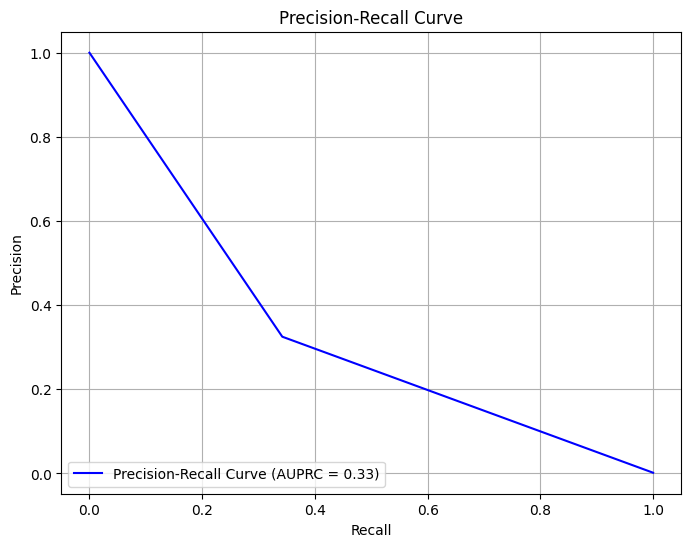

Area under the Precision-Recall Curve (AUPRC): 0.33411058011377454


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc



# Calculate precision and recall scores
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Calculate the area under the Precision-Recall Curve (AUPRC)
auprc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("Area under the Precision-Recall Curve (AUPRC):", auprc)


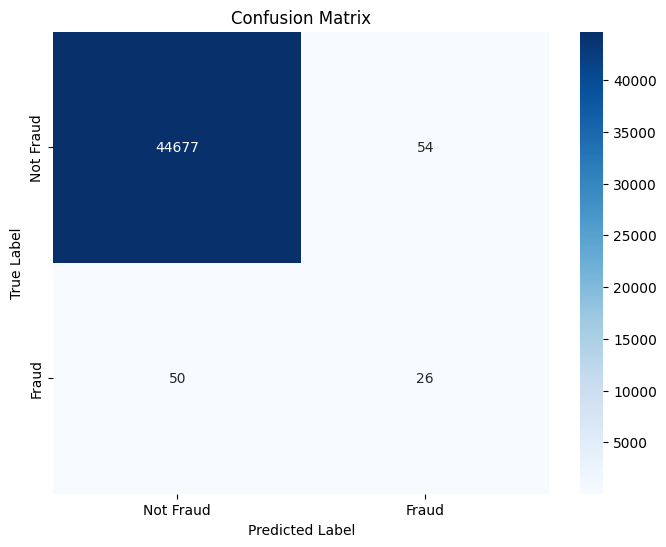

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **4.2.Isolation Forest on balanced dataset**

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score

#  non balanced
fraud = data[data['Class'] == 1] # Number of fraudulent transactions
valid = data[data['Class'] == 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))


isolationForest = IsolationForest(max_samples = len(x_train_balanced),contamination = outlier_fraction,random_state=239545).fit(x_train_balanced) # random state added to ensure reprodicability, Fitting the model.
y_predicted_b = isolationForest.predict(x_test) # Prediction using trained model.
y_predicted_b[y_predicted_b == 1] = 0 # Valid transactions are labelled as 0.
y_predicted_b[y_predicted_b == -1] = 1 # Fraudulent transactions are labelled as 1.
errors_b = (y_predicted_b != y_test).sum() # Total number of errors is calculated.
print("Total errors: {}".format(errors_b))
print("Accuracy Score: {}".format(accuracy_score(y_predicted_b,y_test)))
print(classification_report(y_test,y_predicted_b,target_names=['Not Fraud','Fraud']))

Total errors: 100
Accuracy Score: 0.9977682058606914
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     44731
       Fraud       0.07      0.03      0.04        76

    accuracy                           1.00     44807
   macro avg       0.53      0.51      0.52     44807
weighted avg       1.00      1.00      1.00     44807



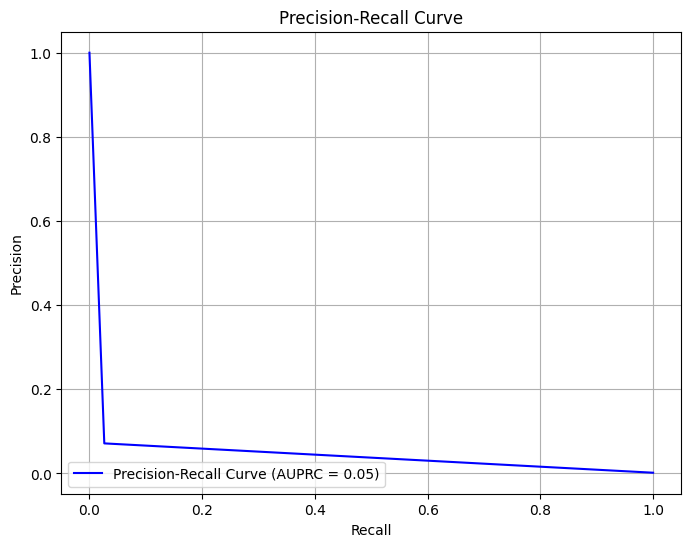

Area under the Precision-Recall Curve (AUPRC): 0.049697944282672


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc



# Calculate precision and recall scores
precision, recall, _ = precision_recall_curve(y_test, y_predicted_b)

# Calculate the area under the Precision-Recall Curve (AUPRC)
auprc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("Area under the Precision-Recall Curve (AUPRC):", auprc)


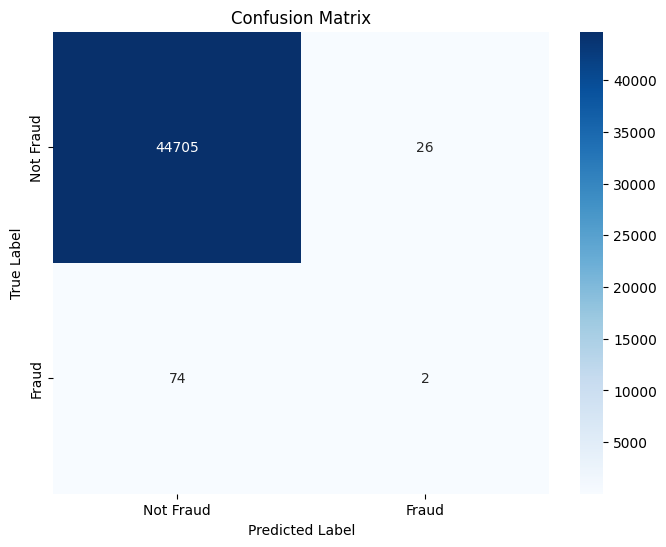

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predicted_b)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **5.Evaluation of results**


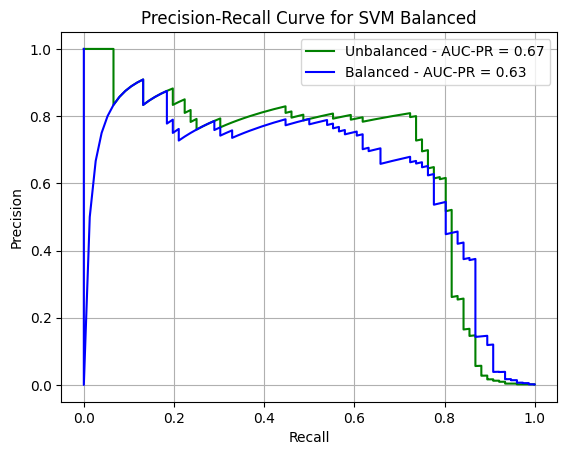

Unbalanced SVM Average Precision : 0.6766981994391814
Unbalanced SVM Area Under the Precision-Recall Curve (AUPRC) : 0.6742613630662013
Balanced SVM Average Precision : 0.6390975858055421
Balanced SVM Area Under the Precision-Recall Curve (AUPRC) : 0.6308534164967172


In [ ]:
# Plot the precision-recall curve for the unbalanced dataset (green color)
plt.plot(recall_svm, precision_svm, color='green', label=f'Unbalanced - AUC-PR = {auc_precision_recall_svm:.2f}')
from sklearn.metrics import precision_recall_curve, auc
# Plot the precision-recall curve for the balanced dataset (blue color)
plt.plot(recall_svm_balanced, precision_svm_balanced, color='blue', label=f'Balanced - AUC-PR = {auc_precision_recall_svm_balanced:.2f}')

# Set plot labels, legend, and grid
plt.title("Precision-Recall Curve for SVM Balanced")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='best')
plt.grid()

# Show the plot
plt.show()

print('Unbalanced SVM Average Precision : {}'.format(average_precision_svm))
print('Unbalanced SVM Area Under the Precision-Recall Curve (AUPRC) : {}'.format(auc_precision_recall_svm))

print('Balanced SVM Average Precision : {}'.format(average_precision_svm_balanced))
print('Balanced SVM Area Under the Precision-Recall Curve (AUPRC) : {}'.format(auc_precision_recall_svm_balanced))

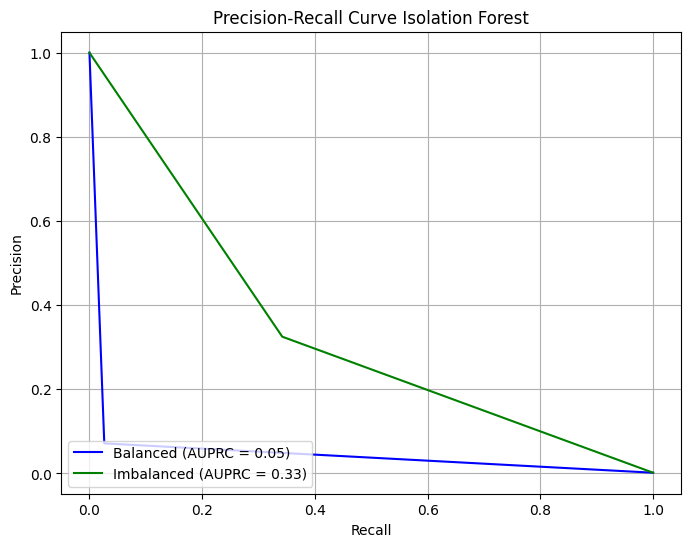

Area under the Precision-Recall Curve (AUPRC) - Balanced: 0.049697944282672
Area under the Precision-Recall Curve (AUPRC) - Imbalanced: 0.33411058011377454


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall scores for balanced dataset
precision_balanced, recall_balanced, _ = precision_recall_curve(y_test, y_predicted_b)
auprc_balanced = auc(recall_balanced, precision_balanced)

# Calculate precision and recall scores for imbalanced dataset
precision_imbalanced, recall_imbalanced, _ = precision_recall_curve(y_test, y_predicted)
auprc_imbalanced = auc(recall_imbalanced, precision_imbalanced)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_balanced, precision_balanced, color='blue', label='Balanced (AUPRC = %0.2f)' % auprc_balanced)
plt.plot(recall_imbalanced, precision_imbalanced, color='green', label='Imbalanced (AUPRC = %0.2f)' % auprc_imbalanced)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Isolation Forest')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("Area under the Precision-Recall Curve (AUPRC) - Balanced:", auprc_balanced)
print("Area under the Precision-Recall Curve (AUPRC) - Imbalanced:", auprc_imbalanced)
